# 따릉이

In [1]:
import pandas as pd #판다스 패키지

In [4]:
# 파일 읽기
train=pd.read_csv('/content/drive/MyDrive/따릉이/train.csv') #모델 학습 파일
test=pd.read_csv('/content/drive/MyDrive/따릉이/test.csv') #모델 시험지 파일
submission = pd.read_csv('/content/drive/MyDrive/따릉이/submission.csv')#답안지 파일

# EDA

## 탐색적 자료분석 (어떤 데이터)

In [5]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [6]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [7]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


* preciptation : 비 정보. 비 안오면 0 비오면 1
* visibility : 시정, 시계
* count : 따릉이 대여수

- count 를 예측. (train을 바탕으로 test)


### 데이터 크기

In [8]:
print(train.shape)
print(test.shape) #count 열 없음
print(submission.shape) #test 셋의 count 값을 submission(답안지)에 

(1459, 11)
(715, 10)
(715, 2)


### 결측값 확인

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


id hour (1459obs) 제외 결측치 존재

In [10]:

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


Id hour (715 obs) 

In [11]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [12]:
test.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


##### 시간별로 따릉이 대여량 평균

In [13]:
train.groupby('hour').mean()

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,,,,,,,,,,
0,1200.016667,14.788136,0.016949,1.965517,58.169492,1434.220339,0.033763,55.881356,30.982759,71.766667
1,1074.918033,14.155738,0.049180,1.836667,60.459016,1400.852459,NaN,NaN,NaN,47.606557
2,1077.885246,13.747541,0.049180,1.633333,61.721311,1374.278689,0.030492,58.475410,31.366667,31.409836
3,1146.704918,13.357377,0.032787,1.620000,63.131148,1326.311475,0.031213,59.180328,31.466667,21.377049
4,1194.786885,13.001639,0.016393,1.409836,64.573770,1264.606557,0.031984,58.278689,32.116667,13.524590
5,1091.819672,12.673770,0.016393,1.296721,66.000000,1203.426230,0.031623,56.721311,31.525424,13.114754
6,1112.393443,12.377049,0.016393,1.331148,67.409836,1146.229508,0.029317,56.150000,31.603448,24.557377
7,1086.262295,12.191803,0.016393,1.262295,67.934426,1150.311475,0.025300,56.533333,31.779661,62.360656
8,1086.491803,12.600000,0.032787,1.632787,64.049180,1152.868852,0.021197,57.918033,31.796610,136.688525


In [14]:
train.groupby('hour').mean()['count']

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

In [15]:
#시간대별 데이터 개수
train.groupby('hour').count()

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,,,,,,,,,,
0,60,59,59,58,59,59,59,59,58,60
1,61,61,61,60,61,61,0,0,0,61
2,61,61,61,60,61,61,61,61,60,61
3,61,61,61,60,61,61,61,61,60,61
4,61,61,61,61,61,61,61,61,60,61
5,61,61,61,61,61,61,61,61,59,61
6,61,61,61,61,61,61,60,60,58,61
7,61,61,61,61,61,61,60,60,59,61
8,61,61,61,61,61,61,61,61,59,61


### 시각화

In [16]:
# 시각화
import matplotlib.pyplot as plt

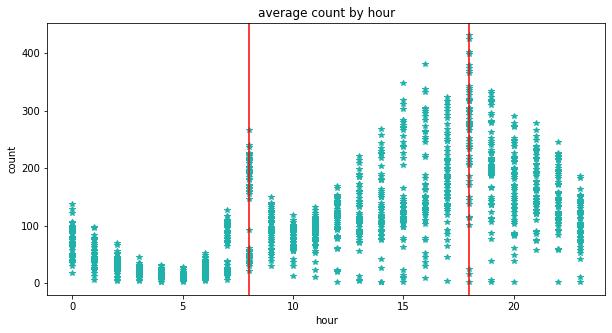

In [17]:
plt.figure(figsize=(10,5))
plt.plot(train['hour'],train['count'],'*',data=train,color='lightseagreen')

plt.title('average count by hour')
plt.xlabel('hour')
plt.ylabel('count')

plt.axvline(8,color='red') #vertical line
plt.axvline(18,color='red')

plt.show()

출근/등교시간이나 퇴근/하교시간에 많음

Text(18, 260, 'go home')

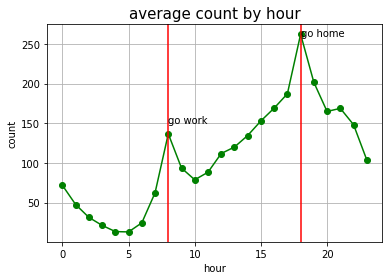

In [18]:
plt.plot(train.groupby('hour').mean()['count'],marker='o',color='g')
plt.grid()

#제목 축
plt.title('average count by hour',fontsize=15)
plt.xlabel('hour')
plt.ylabel('count')

#위에 원하는 선

plt.axvline(8,color='red') #vertical line
plt.axvline(18,color='red')

#원하는 텍스트
plt.text(8,150,'go work')
plt.text(18,260,'go home')

#plt.savefig('picture.png')

시간이 증가할수록 대여량 증가

~

변수간에 상관관계 표현 (상관계수)
* -1 ~ 1

In [19]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [20]:
#heatmap
import seaborn as sns
import numpy as np

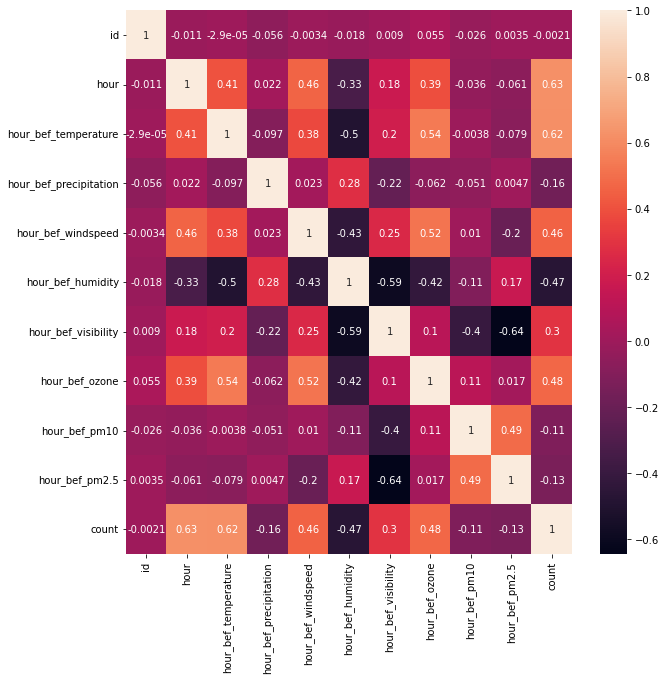

In [21]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = False

sns.heatmap(train.corr(),annot=True)

count 상관계수 높은 hour, temp, windspeed 사용 + humidity & ozone


* 추가 몇몇 그래프


### 이상치 확인

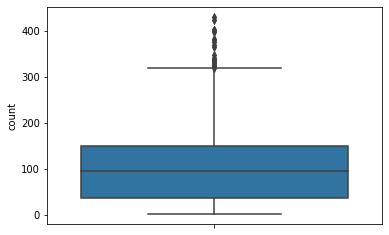

In [ ]:
sns.boxplot(y='count',data=train)

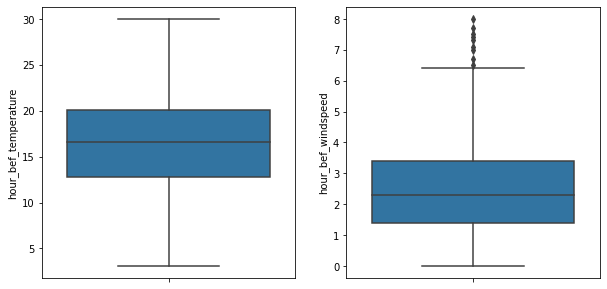

In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(y='hour_bef_temperature',data=train,ax=ax1)
sns.boxplot(y='hour_bef_windspeed',data=train,ax=ax2)

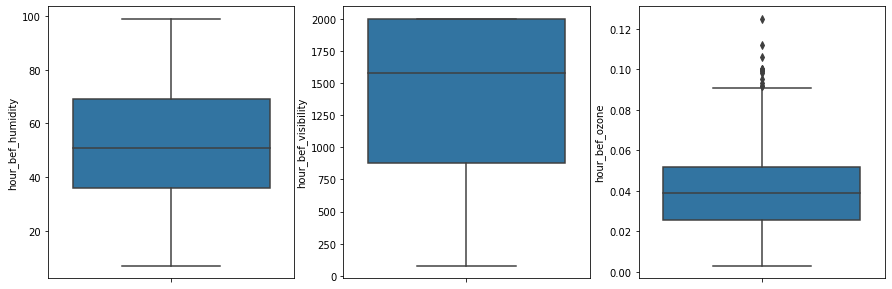

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.boxplot(y='hour_bef_humidity',data=train,ax=ax1)
sns.boxplot(y='hour_bef_visibility',data=train,ax=ax2)
sns.boxplot(y='hour_bef_ozone',data=train,ax=ax3)

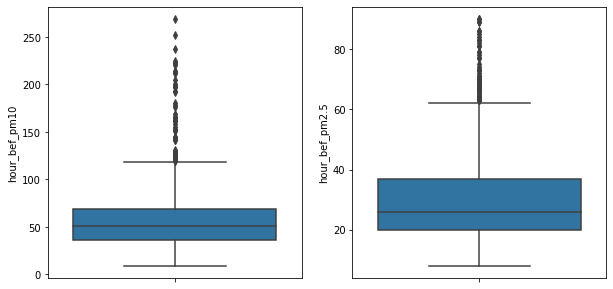

In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(y='hour_bef_pm10',data=train,ax=ax1)
sns.boxplot(y='hour_bef_pm2.5',data=train,ax=ax2)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Text(0.4, 0.153, '0.151~')

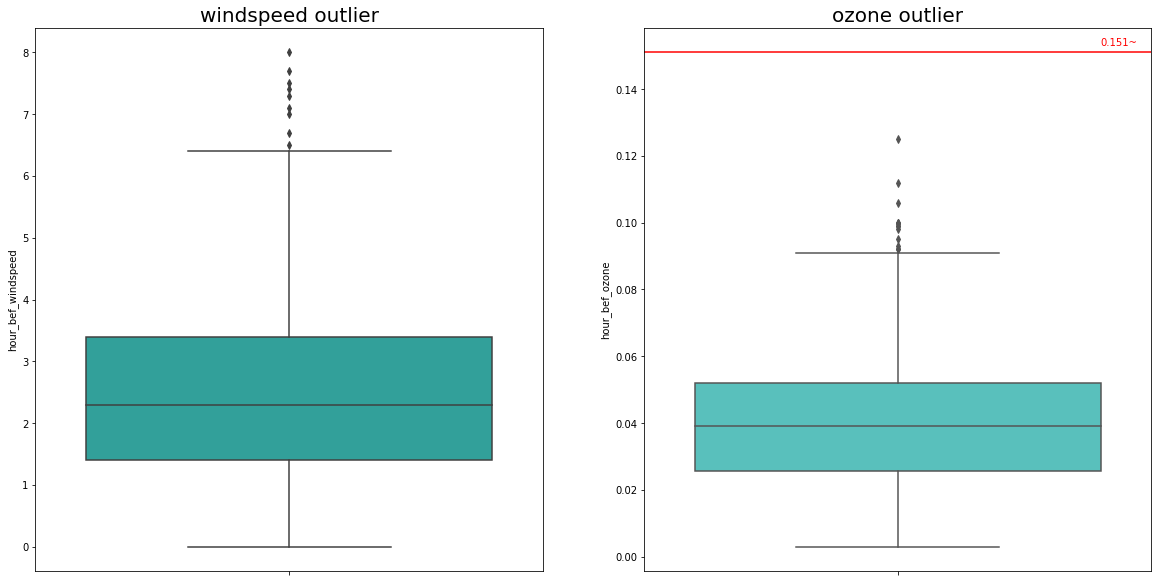

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(y='hour_bef_windspeed',data=train,ax=ax1,color='lightseagreen').set_title('windspeed outlier',fontsize=20)

sns.boxplot(y='hour_bef_ozone',data=train,ax=ax2,color='mediumturquoise').set_title('ozone outlier',fontsize=20)
"""
좋음 ~0.030
보통~0.090
나쁨~0.150
매우나쁨0.151~
"""
"""
plt.axhline(0,color='blue')
plt.axhline(0.030,color='green')
plt.axhline(0.090,color='orange')
"""
plt.axhline(0.151,color='red')
plt.text(0.4,0.153,'0.151~',color='red')



Text(0.4, 77, '76~')

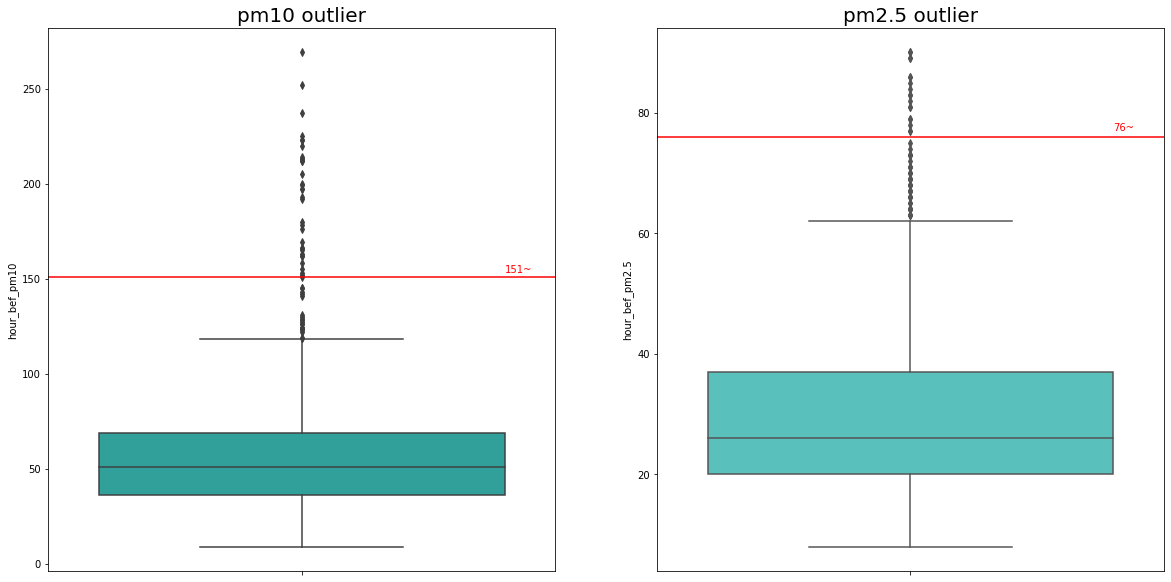

In [26]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)


sns.boxplot(y='hour_bef_pm10',data=train,ax=ax1,color='lightseagreen').set_title('pm10 outlier',fontsize=20)
plt.axhline(151,color='red')
plt.text(0.4,153,'151~',color='red')

"""
좋음 0~30
보통~80
나쁨~150
매우나쁨151~
"""
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(y='hour_bef_pm2.5',data=train,ax=ax2,color='mediumturquoise').set_title('pm2.5 outlier',fontsize=20)
plt.axhline(76,color='red')
plt.text(0.4,77,'76~',color='red')


Text(0.45, 153, '151~')

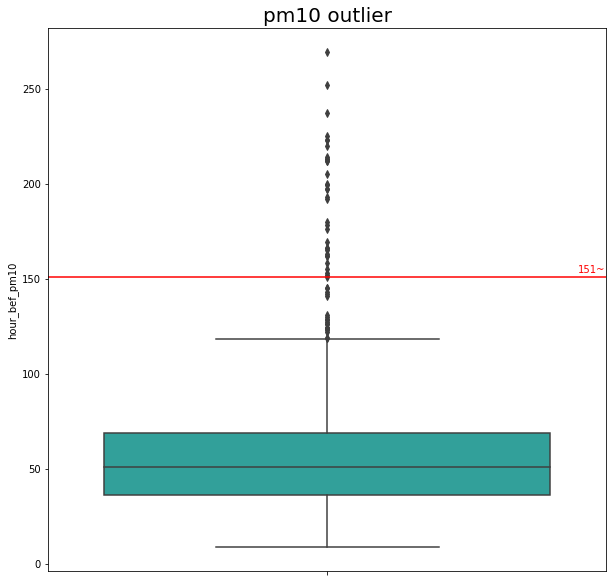

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(y='hour_bef_pm10',data=train,color='lightseagreen').set_title('pm10 outlier',fontsize=20)

plt.axhline(151,color='red')

plt.text(0.45,153,'151~',color='red')

Text(0.45, 77, '76~')

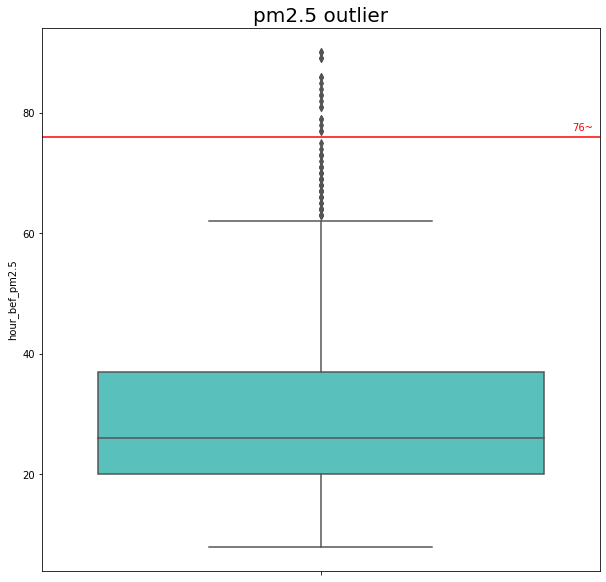

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(y='hour_bef_pm2.5',data=train,color='mediumturquoise').set_title('pm2.5 outlier',fontsize=20)
plt.axhline(76,color='red')
plt.text(0.45,77,'76~',color='red')

In [ ]:
train[train['hour_bef_pm10']>200]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
49,83,6,11.0,0.0,1.3,25.0,1056.0,0.041,213.0,21.0,12.0
120,179,3,13.2,0.0,2.5,25.0,950.0,0.041,269.0,21.0,16.0
233,365,14,23.1,0.0,3.6,44.0,620.0,0.080,237.0,62.0,91.0
343,527,9,13.4,0.0,2.6,21.0,986.0,0.027,212.0,20.0,59.0
446,690,12,21.4,0.0,3.0,46.0,565.0,0.064,213.0,57.0,104.0
617,947,4,12.3,0.0,2.8,22.0,1082.0,0.042,223.0,20.0,16.0
653,1000,5,11.8,0.0,2.5,21.0,1014.0,0.042,205.0,18.0,6.0
680,1038,16,22.8,0.0,4.3,40.0,716.0,0.075,212.0,NaN,135.0
1061,1597,13,23.2,0.0,3.7,45.0,527.0,0.069,225.0,61.0,91.0
1263,1911,2,14.2,0.0,4.9,33.0,660.0,0.041,252.0,31.0,26.0


In [ ]:
#outlier
"""
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx
"""

def out(df=None,col=None):
  q1=df[col].quantile(q=0.25)
  q3=df[col].quantile(q=0.75)
  iqr=q3-q1

  low=-3*iqr+q1
  high=q3+3*iqr

  lowout = df[(df[col] < low)]
  highout = df[(df[col] > high)]
  print(lowout)
  print(highout)

In [ ]:
out(train,'hour_bef_ozone')

Empty DataFrame
Columns: [id, hour, hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5, count]
Index: []
Empty DataFrame
Columns: [id, hour, hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5, count]
Index: []


In [ ]:
out(train,'hour_bef_pm10')

Empty DataFrame
Columns: [id, hour, hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5, count]
Index: []
        id  hour  hour_bef_temperature  ...  hour_bef_pm10  hour_bef_pm2.5  count
20      35    10                  15.4  ...          199.0            18.0   58.0
49      83     6                  11.0  ...          213.0            21.0   12.0
62      97    21                  18.6  ...          178.0            37.0  139.0
120    179     3                  13.2  ...          269.0            21.0   16.0
183    280    11                  19.6  ...          193.0            54.0   66.0
233    365    14                  23.1  ...          237.0            62.0   91.0
234    366    17                  22.3  ...          200.0             NaN  151.0
280    437    20                  19.3  ...          176.0            39.0  123.0
343    527     9                  13.4  ...          212

In [ ]:
out(train,'hour_bef_pm2.5')

Empty DataFrame
Columns: [id, hour, hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5, count]
Index: []
        id  hour  hour_bef_temperature  ...  hour_bef_pm10  hour_bef_pm2.5  count
428    666    12                  13.8  ...          104.0            89.0   82.0
511    787     4                  12.3  ...           96.0            90.0   14.0
1155  1743     8                  15.3  ...          142.0            89.0  163.0
1191  1796    13                  15.7  ...          105.0            90.0   75.0

[4 rows x 11 columns]


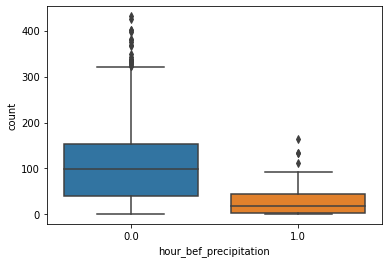

In [ ]:

sns.boxplot(x='hour_bef_precipitation', y='count', data=train)
plt.show()

In [ ]:
#비 여부에 따른 평균대여량
train.groupby('hour_bef_precipitation').mean()['count']

hour_bef_precipitation
0.0    111.130404
1.0     33.673913
Name: count, dtype: float64

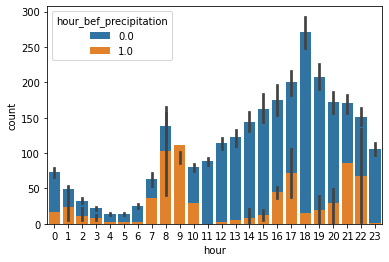

In [ ]:
sns.barplot(x='hour', y='count', hue='hour_bef_precipitation', dodge=False, data=train) #dodge 누적
plt.show()

# 전처리

In [ ]:
train1=train

In [ ]:
train1.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

### 결측치 처리

fillna() 함수로 결측치 대체

#### train dataset


In [ ]:
train1[train1['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
tna = train1[train1['hour_bef_temperature'].isna()].index
tna


Int64Index([934, 1035], dtype='int64')

In [ ]:
train2 = train1.drop(tna) #결측지 제거 된 df = train2

In [ ]:
train2[train2['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [ ]:
#더미변수 생성
tdum = pd.get_dummies(train2['hour'])
train2 = train2.join(tdum.add_prefix('hour_'))
train2

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
train2.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
id,1.000000,-0.010807,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.001212,0.029575,-0.010089,-0.009107,0.013678,0.029596,-0.004493,0.002318,-0.006333,-0.006257,-0.009557,-0.046246,0.034237,0.014649,-0.038329,-0.012602,0.025336,-0.025041,0.024144,0.004871,0.015811,-0.034583,0.001223,0.015870,-0.008461
hour,-0.010807,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.627227,-0.341481,-0.317246,-0.287023,-0.256801,-0.226578,-0.196355,-0.166132,-0.135909,-0.105686,-0.075464,-0.045241,-0.015018,0.015205,0.045038,0.075650,0.105873,0.134928,0.164891,0.194854,0.226764,0.256987,0.284744,0.317433,0.347656
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404,-0.075676,-0.102244,-0.118536,-0.134109,-0.148307,-0.161393,-0.173236,-0.180630,-0.164338,-0.095766,-0.018951,0.051976,0.109358,0.155546,0.180285,0.200634,0.209625,0.193335,0.166559,0.119238,0.058846,0.010324,-0.026083,-0.051862
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985,-0.017180,0.021051,0.021051,0.001453,-0.018145,-0.018145,-0.018145,-0.018145,0.001453,-0.018145,-0.018145,-0.037743,-0.018145,-0.017666,0.040648,0.040648,0.021841,0.081102,-0.017666,0.001453,0.021051,-0.017666,0.001453,-0.018145
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906,-0.076079,-0.096865,-0.127527,-0.129538,-0.162626,-0.179830,-0.174594,-0.185067,-0.128715,-0.098793,-0.054161,0.000945,0.043373,0.119930,0.158780,0.196182,0.202210,0.199446,0.204975,0.169751,0.120530,0.041614,0.002940,-0.043189
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142,0.059907,0.084460,0.097418,0.111890,0.126699,0.141340,0.155812,0.161197,0.121314,0.057198,-0.006245,-0.061274,-0.103513,-0.136184,-0.150464,-0.152315,-0.160609,-0.135845,-0.119900,-0.088872,-0.047811,-0.018129,0.017651,0.042726
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094,0.010221,-0.001565,-0.011094,-0.028295,-0.050422,-0.072361,-0.092872,-0.091408,-0.090491,-0.077499,-0.040852,-0.016620,0.023090,0.038058,0.041061,0.044053,0.057368,0.055644,0.062796,0.061489,0.057497,0.065699,0.038321,0.020544
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614,-0.058301,NaN,-0.095353,-0.087408,-0.078922,-0.082894,-0.107365,-0.151225,-0.197733,-0.194483,-0.152681,-0.095899,-0.025468,0.065534,0.156353,0.199294,0.227824,0.227573,0.209550,0.163214,0.100558,0.047694,-0.011933,-0.044073
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288,-0.008603,NaN,0.008885,0.013678,0.007547,-0.003042,-0.006867,-0.004283,0.005095,0.013455,0.026389,0.021108,0.014412,0.015740,0.007514,0.001251,0.000965,-0.000547,-0.001910,-0.022193,-0.027063,-0.021810,-0.020878,-0.018648
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293,0.009474,NaN,0.015291,0.016762,0.026322,0.017472,0.018444,0.021178,0.021426,0.018968,0.008976,0.007232,-0.014985,-0.005401,-0.006969,-0.022915,-0.034284,-0.025163,-0.016864,-0.028988,-0.021727,-0.009218,-0.001625,0.003880


In [ ]:
#풍속의 결측치 위치
train2[train2['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
244,381,1,14.1,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train2.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
id,1.000000,-0.010807,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.001212,0.029575,-0.010089,-0.009107,0.013678,0.029596,-0.004493,0.002318,-0.006333,-0.006257,-0.009557,-0.046246,0.034237,0.014649,-0.038329,-0.012602,0.025336,-0.025041,0.024144,0.004871,0.015811,-0.034583,0.001223,0.015870,-0.008461
hour,-0.010807,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.627227,-0.341481,-0.317246,-0.287023,-0.256801,-0.226578,-0.196355,-0.166132,-0.135909,-0.105686,-0.075464,-0.045241,-0.015018,0.015205,0.045038,0.075650,0.105873,0.134928,0.164891,0.194854,0.226764,0.256987,0.284744,0.317433,0.347656
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404,-0.075676,-0.102244,-0.118536,-0.134109,-0.148307,-0.161393,-0.173236,-0.180630,-0.164338,-0.095766,-0.018951,0.051976,0.109358,0.155546,0.180285,0.200634,0.209625,0.193335,0.166559,0.119238,0.058846,0.010324,-0.026083,-0.051862
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985,-0.017180,0.021051,0.021051,0.001453,-0.018145,-0.018145,-0.018145,-0.018145,0.001453,-0.018145,-0.018145,-0.037743,-0.018145,-0.017666,0.040648,0.040648,0.021841,0.081102,-0.017666,0.001453,0.021051,-0.017666,0.001453,-0.018145
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906,-0.076079,-0.096865,-0.127527,-0.129538,-0.162626,-0.179830,-0.174594,-0.185067,-0.128715,-0.098793,-0.054161,0.000945,0.043373,0.119930,0.158780,0.196182,0.202210,0.199446,0.204975,0.169751,0.120530,0.041614,0.002940,-0.043189
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142,0.059907,0.084460,0.097418,0.111890,0.126699,0.141340,0.155812,0.161197,0.121314,0.057198,-0.006245,-0.061274,-0.103513,-0.136184,-0.150464,-0.152315,-0.160609,-0.135845,-0.119900,-0.088872,-0.047811,-0.018129,0.017651,0.042726
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094,0.010221,-0.001565,-0.011094,-0.028295,-0.050422,-0.072361,-0.092872,-0.091408,-0.090491,-0.077499,-0.040852,-0.016620,0.023090,0.038058,0.041061,0.044053,0.057368,0.055644,0.062796,0.061489,0.057497,0.065699,0.038321,0.020544
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614,-0.058301,NaN,-0.095353,-0.087408,-0.078922,-0.082894,-0.107365,-0.151225,-0.197733,-0.194483,-0.152681,-0.095899,-0.025468,0.065534,0.156353,0.199294,0.227824,0.227573,0.209550,0.163214,0.100558,0.047694,-0.011933,-0.044073
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288,-0.008603,NaN,0.008885,0.013678,0.007547,-0.003042,-0.006867,-0.004283,0.005095,0.013455,0.026389,0.021108,0.014412,0.015740,0.007514,0.001251,0.000965,-0.000547,-0.001910,-0.022193,-0.027063,-0.021810,-0.020878,-0.018648
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293,0.009474,NaN,0.015291,0.016762,0.026322,0.017472,0.018444,0.021178,0.021426,0.018968,0.008976,0.007232,-0.014985,-0.005401,-0.006969,-0.022915,-0.034284,-0.025163,-0.016864,-0.028988,-0.021727,-0.009218,-0.001625,0.003880


In [ ]:
#1시 median 으로
train2[train['hour']==1]['hour_bef_windspeed'].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


1.65

In [ ]:
train2.loc[244,'hour_bef_windspeed']=1.65
train2.loc[244,]

id                         381.00
hour                         1.00
hour_bef_temperature        14.10
hour_bef_precipitation       0.00
hour_bef_windspeed           1.65
hour_bef_humidity           55.00
hour_bef_visibility       1992.00
hour_bef_ozone                NaN
hour_bef_pm10                 NaN
hour_bef_pm2.5                NaN
count                       38.00
hour_0                       0.00
hour_1                       1.00
hour_2                       0.00
hour_3                       0.00
hour_4                       0.00
hour_5                       0.00
hour_6                       0.00
hour_7                       0.00
hour_8                       0.00
hour_9                       0.00
hour_10                      0.00
hour_11                      0.00
hour_12                      0.00
hour_13                      0.00
hour_14                      0.00
hour_15                      0.00
hour_16                      0.00
hour_17                      0.00
hour_18       

In [ ]:
train2[train2['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'windspeed')

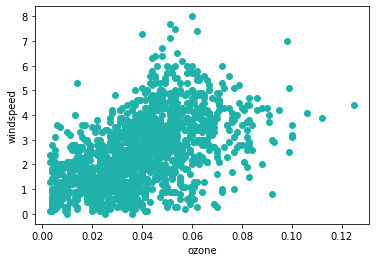

In [ ]:
#ozone 을 통해 windspeed 결측치
plt.scatter(x='hour_bef_ozone',y='hour_bef_windspeed',data=train2,color='lightseagreen')
plt.xlabel('ozone')
plt.ylabel('windspeed')

In [ ]:
train2.groupby('hour_bef_ozone')['hour_bef_windspeed'].describe()

,count,mean,std,min,25%,50%,75%,max
hour_bef_ozone,,,,,,,,
0.003,4.0,1.475000,1.027538,0.1,1.000,1.7,2.175,2.4
0.004,20.0,1.145000,0.747258,0.1,0.475,1.0,1.725,2.8
0.005,17.0,1.335294,0.831370,0.2,0.800,1.0,1.800,3.1
0.006,16.0,1.162500,0.814760,0.3,0.600,0.9,1.700,3.6
0.007,11.0,1.400000,0.869483,0.4,0.900,1.3,1.650,3.5
...,...,...,...,...,...,...,...,...
0.099,2.0,3.800000,1.838478,2.5,3.150,3.8,4.450,5.1
0.100,3.0,3.300000,0.264575,3.1,3.150,3.2,3.400,3.6
0.106,1.0,4.100000,NaN,4.1,4.100,4.1,4.100,4.1


In [ ]:
train2.groupby('hour_bef_ozone')['hour_bef_windspeed'].median()

hour_bef_ozone
0.003    1.7
0.004    1.0
0.005    1.0
0.006    0.9
0.007    1.3
        ... 
0.099    3.8
0.100    3.2
0.106    4.1
0.112    3.9
0.125    4.4
Name: hour_bef_windspeed, Length: 95, dtype: float64

In [ ]:
train2.groupby('hour_bef_ozone')['hour_bef_windspeed'].median().isna().sum()

0

In [ ]:
train2[train2['hour_bef_ozone']==0.046]['hour_bef_windspeed'].describe()

count    17.000000
mean      3.358824
std       1.212466
min       1.400000
25%       2.800000
50%       3.200000
75%       4.200000
max       6.000000
Name: hour_bef_windspeed, dtype: float64

In [ ]:
train2[train2['hour_bef_ozone']==0.049]['hour_bef_windspeed'].describe()

count    28.000000
mean      2.642857
std       1.499735
min       0.500000
25%       1.375000
50%       2.500000
75%       3.400000
max       5.500000
Name: hour_bef_windspeed, dtype: float64

In [ ]:
tt=train2[0.057<train2['hour_bef_ozone']]
tt=tt[tt['hour_bef_ozone']<0.059]
tt['hour_bef_windspeed'].describe()

count    14.000000
mean      3.871429
std       1.478267
min       0.600000
25%       3.175000
50%       3.900000
75%       4.800000
max       6.000000
Name: hour_bef_windspeed, dtype: float64

In [ ]:
tt=train2[0.044<=train2['hour_bef_ozone']]
tt=tt[tt['hour_bef_ozone']<0.045]
tt['hour_bef_windspeed'].describe()

count    29.000000
mean      3.682759
std       1.194950
min       1.000000
25%       3.100000
50%       3.500000
75%       4.500000
max       6.300000
Name: hour_bef_windspeed, dtype: float64

In [ ]:
train2[train2['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#1시가 아닌 windspeed 결측치 - ozone 별로 나누어 median으로 대체
train2['hour_bef_windspeed'].fillna({18:3.2,260:2.5,376:3.5, 780:3.9 ,1138:3.5,1229:3.5}, inplace=True)

In [ ]:
train2.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             74
hour_bef_pm10              88
hour_bef_pm2.5            115
count                       0
hour_0                      0
hour_1                      0
hour_2                      0
hour_3                      0
hour_4                      0
hour_5                      0
hour_6                      0
hour_7                      0
hour_8                      0
hour_9                      0
hour_10                     0
hour_11                     0
hour_12                     0
hour_13                     0
hour_14                     0
hour_15                     0
hour_16                     0
hour_17                     0
hour_18                     0
hour_19                     0
hour_20                     0
hour_21                     0
hour_22   

In [ ]:
#ozone 결측치 확인
train2[train2['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
122,181,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0.0,2.1,35.0,2000.0,NaN,NaN,NaN,62.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1322,1994,1,15.1,0.0,1.3,35.0,2000.0,NaN,NaN,NaN,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train[train['hour']==1]['hour_bef_ozone']

14     NaN
46     NaN
84     NaN
142    NaN
147    NaN
        ..
1283   NaN
1322   NaN
1329   NaN
1361   NaN
1391   NaN
Name: hour_bef_ozone, Length: 61, dtype: float64

In [ ]:
train2.groupby('hour')['hour_bef_ozone'].describe()
#1시 일때 모두 NAN

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,59.0,0.033763,0.016296,0.003,0.02250,0.0350,0.04250,0.074
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61.0,0.030492,0.016567,0.003,0.01800,0.0310,0.03900,0.083
3,61.0,0.031213,0.017270,0.003,0.01800,0.0340,0.04100,0.082
4,61.0,0.031984,0.016320,0.004,0.02000,0.0330,0.04100,0.081
5,61.0,0.031623,0.015445,0.004,0.02200,0.0320,0.04000,0.077
6,60.0,0.029317,0.014817,0.004,0.02000,0.0295,0.03900,0.069
7,60.0,0.025300,0.014314,0.003,0.01475,0.0250,0.03325,0.062
8,61.0,0.021197,0.012415,0.004,0.01200,0.0210,0.02800,0.061


In [ ]:
train2.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
id,1.000000,-0.010807,-0.000029,-0.056267,-0.002720,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.001212,0.029575,-0.010089,-0.009107,0.013678,0.029596,-0.004493,0.002318,-0.006333,-0.006257,-0.009557,-0.046246,0.034237,0.014649,-0.038329,-0.012602,0.025336,-0.025041,0.024144,0.004871,0.015811,-0.034583,0.001223,0.015870,-0.008461
hour,-0.010807,1.000000,0.407306,0.021646,0.460725,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.627227,-0.341481,-0.317246,-0.287023,-0.256801,-0.226578,-0.196355,-0.166132,-0.135909,-0.105686,-0.075464,-0.045241,-0.015018,0.015205,0.045038,0.075650,0.105873,0.134928,0.164891,0.194854,0.226764,0.256987,0.284744,0.317433,0.347656
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375323,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404,-0.075676,-0.102244,-0.118536,-0.134109,-0.148307,-0.161393,-0.173236,-0.180630,-0.164338,-0.095766,-0.018951,0.051976,0.109358,0.155546,0.180285,0.200634,0.209625,0.193335,0.166559,0.119238,0.058846,0.010324,-0.026083,-0.051862
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022322,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985,-0.017180,0.021051,0.021051,0.001453,-0.018145,-0.018145,-0.018145,-0.018145,0.001453,-0.018145,-0.018145,-0.037743,-0.018145,-0.017666,0.040648,0.040648,0.021841,0.081102,-0.017666,0.001453,0.021051,-0.017666,0.001453,-0.018145
hour_bef_windspeed,-0.002720,0.460725,0.375323,0.022322,1.000000,-0.433562,0.252381,0.520934,0.009185,-0.199637,0.459057,-0.073232,-0.098505,-0.124280,-0.128763,-0.162880,-0.180063,-0.174834,-0.185293,-0.129012,-0.099128,-0.054551,0.000485,0.045062,0.120175,0.158123,0.195477,0.201502,0.198741,0.204263,0.169080,0.122511,0.041107,0.002477,-0.043594
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433562,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142,0.059907,0.084460,0.097418,0.111890,0.126699,0.141340,0.155812,0.161197,0.121314,0.057198,-0.006245,-0.061274,-0.103513,-0.136184,-0.150464,-0.152315,-0.160609,-0.135845,-0.119900,-0.088872,-0.047811,-0.018129,0.017651,0.042726
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252381,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094,0.010221,-0.001565,-0.011094,-0.028295,-0.050422,-0.072361,-0.092872,-0.091408,-0.090491,-0.077499,-0.040852,-0.016620,0.023090,0.038058,0.041061,0.044053,0.057368,0.055644,0.062796,0.061489,0.057497,0.065699,0.038321,0.020544
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520934,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614,-0.058301,NaN,-0.095353,-0.087408,-0.078922,-0.082894,-0.107365,-0.151225,-0.197733,-0.194483,-0.152681,-0.095899,-0.025468,0.065534,0.156353,0.199294,0.227824,0.227573,0.209550,0.163214,0.100558,0.047694,-0.011933,-0.044073
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.009185,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288,-0.008603,NaN,0.008885,0.013678,0.007547,-0.003042,-0.006867,-0.004283,0.005095,0.013455,0.026389,0.021108,0.014412,0.015740,0.007514,0.001251,0.000965,-0.000547,-0.001910,-0.022193,-0.027063,-0.021810,-0.020878,-0.018648
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199637,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293,0.009474,NaN,0.015291,0.016762,0.026322,0.017472,0.018444,0.021178,0.021426,0.018968,0.008976,0.007232,-0.014985,-0.005401,-0.006969,-0.022915,-0.034284,-0.025163,-0.016864,-0.028988,-0.021727,-0.009218,-0.001625,0.003880


Text(0, 0.5, 'mean ozone')

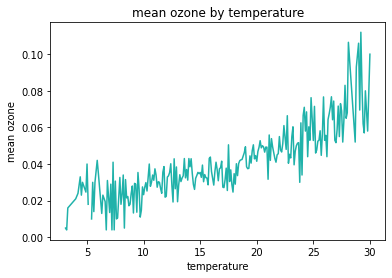

In [ ]:
plt.plot(train2.groupby('hour_bef_temperature')['hour_bef_ozone'].mean(),color='lightseagreen')
plt.title('mean ozone by temperature')
plt.xlabel('temperature')
plt.ylabel('mean ozone')
#온도별 평균 ozone


Text(0, 0.5, 'ozone')

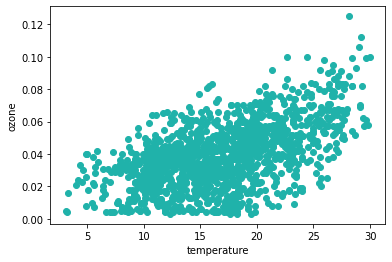

In [ ]:
plt.scatter(x='hour_bef_temperature',y='hour_bef_ozone',data=train2,color='lightseagreen')

plt.xlabel('temperature')
plt.ylabel('ozone')

In [ ]:
train2.groupby('hour_bef_temperature')['hour_bef_temperature','hour_bef_ozone'].mean() #온도에 따른 ozone

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,hour_bef_temperature,hour_bef_ozone
hour_bef_temperature,,
3.1,3.1,0.005
3.2,3.2,0.004
3.3,3.3,0.016
4.0,4.0,0.021
4.2,4.2,0.024
...,...,...
29.4,29.4,0.062
29.5,29.5,0.057
29.6,29.6,0.080


In [ ]:
train['hour_bef_temperature'].describe()

count    1457.000000
mean       16.717433
std         5.239150
min         3.100000
25%        12.800000
50%        16.600000
75%        20.100000
max        30.000000
Name: hour_bef_temperature, dtype: float64

In [ ]:
#구간별 온도와 평균 오존농도
tempoz={}
for x in range(3, 31, 1): #구간은 1도 씩 끊음.
    start = x
    end = x+1
    temp = train2[(train2["hour_bef_temperature"] >= start) & (train2["hour_bef_temperature"] < end)]
    tempoz[start]= temp["hour_bef_ozone"].mean()
#print(tempoz)


#결측치 구간온도별 오존평균값으로 대체하는 반복문 작성
for i in train2[train2['hour_bef_ozone'].isna()].index:
  a=train2.loc[i,'hour_bef_temperature']
  aa=a//1 
  #print(aa,tempoz[aa])
  train2['hour_bef_ozone'].fillna({i:tempoz[aa]},inplace=True)
  

In [ ]:
train2[train2['hour_bef_ozone'].isna()] #결측치 제거

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23


In [ ]:
#미세먼지 - visibility로 pm 결측치 대체
train2.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
id,1.000000,-0.010807,-0.000029,-0.056267,-0.002720,-0.017948,0.008950,0.051551,-0.025510,0.003545,-0.001212,0.029575,-0.010089,-0.009107,0.013678,0.029596,-0.004493,0.002318,-0.006333,-0.006257,-0.009557,-0.046246,0.034237,0.014649,-0.038329,-0.012602,0.025336,-0.025041,0.024144,0.004871,0.015811,-0.034583,0.001223,0.015870,-0.008461
hour,-0.010807,1.000000,0.407306,0.021646,0.460725,-0.329612,0.176491,0.387679,-0.035907,-0.061229,0.627227,-0.341481,-0.317246,-0.287023,-0.256801,-0.226578,-0.196355,-0.166132,-0.135909,-0.105686,-0.075464,-0.045241,-0.015018,0.015205,0.045038,0.075650,0.105873,0.134928,0.164891,0.194854,0.226764,0.256987,0.284744,0.317433,0.347656
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375323,-0.496088,0.197417,0.546467,-0.003830,-0.078665,0.619404,-0.075676,-0.102244,-0.118536,-0.134109,-0.148307,-0.161393,-0.173236,-0.180630,-0.164338,-0.095766,-0.018951,0.051976,0.109358,0.155546,0.180285,0.200634,0.209625,0.193335,0.166559,0.119238,0.058846,0.010324,-0.026083,-0.051862
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022322,0.276481,-0.217155,-0.063328,-0.051266,0.004742,-0.163985,-0.017180,0.021051,0.021051,0.001453,-0.018145,-0.018145,-0.018145,-0.018145,0.001453,-0.018145,-0.018145,-0.037743,-0.018145,-0.017666,0.040648,0.040648,0.021841,0.081102,-0.017666,0.001453,0.021051,-0.017666,0.001453,-0.018145
hour_bef_windspeed,-0.002720,0.460725,0.375323,0.022322,1.000000,-0.433562,0.252381,0.517731,0.009185,-0.199637,0.459057,-0.073232,-0.098505,-0.124280,-0.128763,-0.162880,-0.180063,-0.174834,-0.185293,-0.129012,-0.099128,-0.054551,0.000485,0.045062,0.120175,0.158123,0.195477,0.201502,0.198741,0.204263,0.169080,0.122511,0.041107,0.002477,-0.043594
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433562,1.000000,-0.592244,-0.418717,-0.108106,0.167736,-0.471142,0.059907,0.084460,0.097418,0.111890,0.126699,0.141340,0.155812,0.161197,0.121314,0.057198,-0.006245,-0.061274,-0.103513,-0.136184,-0.150464,-0.152315,-0.160609,-0.135845,-0.119900,-0.088872,-0.047811,-0.018129,0.017651,0.042726
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252381,-0.592244,1.000000,0.099276,-0.403277,-0.644989,0.299094,0.010221,-0.001565,-0.011094,-0.028295,-0.050422,-0.072361,-0.092872,-0.091408,-0.090491,-0.077499,-0.040852,-0.016620,0.023090,0.038058,0.041061,0.044053,0.057368,0.055644,0.062796,0.061489,0.057497,0.065699,0.038321,0.020544
hour_bef_ozone,0.051551,0.387679,0.546467,-0.063328,0.517731,-0.418717,0.099276,1.000000,0.111694,0.015517,0.479541,-0.056328,-0.058628,-0.093095,-0.085205,-0.076777,-0.080722,-0.104094,-0.147310,-0.194769,-0.191542,-0.148745,-0.091238,-0.021397,0.069472,0.156878,0.202659,0.227656,0.227061,0.209700,0.163692,0.101468,0.048954,-0.010249,-0.042168
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.009185,-0.108106,-0.403277,0.111694,1.000000,0.489558,-0.114288,-0.008603,NaN,0.008885,0.013678,0.007547,-0.003042,-0.006867,-0.004283,0.005095,0.013455,0.026389,0.021108,0.014412,0.015740,0.007514,0.001251,0.000965,-0.000547,-0.001910,-0.022193,-0.027063,-0.021810,-0.020878,-0.018648
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199637,0.167736,-0.644989,0.015517,0.489558,1.000000,-0.134293,0.009474,NaN,0.015291,0.016762,0.026322,0.017472,0.018444,0.021178,0.021426,0.018968,0.008976,0.007232,-0.014985,-0.005401,-0.006969,-0.022915,-0.034284,-0.025163,-0.016864,-0.028988,-0.021727,-0.009218,-0.001625,0.003880


"\nsns.regplot(x='hour_bef_visibility', y='hour_bef_pm2.5', data=train2, fit_reg=True,ax=ax2,color='mediumturquoise')\n"

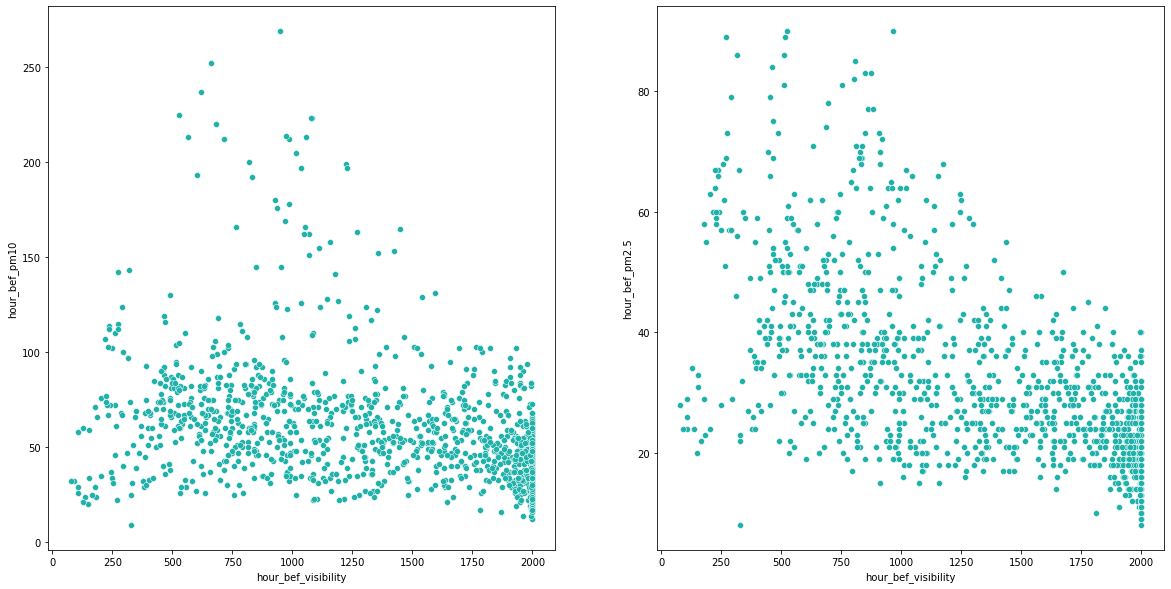

In [ ]:
#pm - visibility
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


sns.scatterplot(x='hour_bef_visibility', y='hour_bef_pm10', data=train2,ax=ax1,color='lightseagreen')
sns.scatterplot(x='hour_bef_visibility', y='hour_bef_pm2.5', data=train2,ax=ax2,color='lightseagreen')
"""
sns.regplot(x='hour_bef_visibility', y='hour_bef_pm2.5', data=train2, fit_reg=True,ax=ax2,color='mediumturquoise')
"""

In [ ]:
train[train['hour_bef_pm10'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
100,149,16,15.8,0.0,5.3,17.0,1923.0,0.047,NaN,NaN,102.0
129,193,19,27.0,0.0,3.6,39.0,2000.0,0.047,NaN,NaN,319.0
...,...,...,...,...,...,...,...,...,...,...,...
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0
1338,2016,19,16.2,0.0,3.5,31.0,950.0,0.060,NaN,NaN,167.0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0
1391,2086,1,11.5,0.0,3.2,23.0,2000.0,NaN,NaN,NaN,42.0


In [ ]:
print(train2['hour_bef_visibility'].describe())
print()
print(train2['hour_bef_pm10'].describe())
print()
print(train2['hour_bef_pm2.5'].describe())

#outlier 있음 - mean 보다는 median 으로 대체

count    1457.000000
mean     1405.216884
std       583.131708
min        78.000000
25%       879.000000
50%      1577.000000
75%      1994.000000
max      2000.000000
Name: hour_bef_visibility, dtype: float64

count    1369.000000
mean       57.168736
std        31.771019
min         9.000000
25%        36.000000
50%        51.000000
75%        69.000000
max       269.000000
Name: hour_bef_pm10, dtype: float64

count    1342.000000
mean       30.327124
std        14.713252
min         8.000000
25%        20.000000
50%        26.000000
75%        37.000000
max        90.000000
Name: hour_bef_pm2.5, dtype: float64


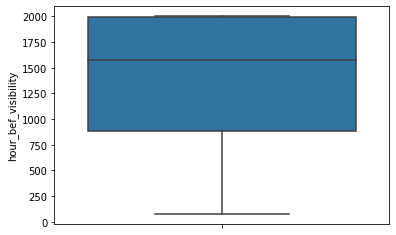

In [ ]:
sns.boxplot(y='hour_bef_visibility',data=train2)

In [ ]:
#visibility 구간 나누기

tempv10={}
tempv25={}
for x in range(0, 2001 , 100): #100씩 나눈다
    start = x
    end = x+100

    #0이상 100미만

    tempp = train2[(train2["hour_bef_visibility"] >= start) & (train2["hour_bef_visibility"] < end)]
    tempv10[start]= tempp["hour_bef_pm10"].median()
    tempv25[start]= tempp["hour_bef_pm2.5"].median()


#pm결측치 구간visibility별 미세먼지 median 값으로 대체하는 반복문 작성
for i in train2[train2['hour_bef_pm10'].isna()].index:
  b = train2.loc[i,'hour_bef_visibility']
  bb = (b//100)*100
  train2['hour_bef_pm10'].fillna( {i:tempv10[bb]},inplace=True )

for i in train2[train2['hour_bef_pm2.5'].isna()].index:
  b = train2.loc[i,'hour_bef_visibility']
  bb = (b//100)*100
  train2['hour_bef_pm2.5'].fillna( {i:tempv25[bb]},inplace=True )



In [ ]:
train2[train2['hour_bef_pm10'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23


In [ ]:
train2.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
hour_0                    0
hour_1                    0
hour_2                    0
hour_3                    0
hour_4                    0
hour_5                    0
hour_6                    0
hour_7                    0
hour_8                    0
hour_9                    0
hour_10                   0
hour_11                   0
hour_12                   0
hour_13                   0
hour_14                   0
hour_15                   0
hour_16                   0
hour_17                   0
hour_18                   0
hour_19                   0
hour_20                   0
hour_21                   0
hour_22                   0
hour_23                   0
dtype: int64

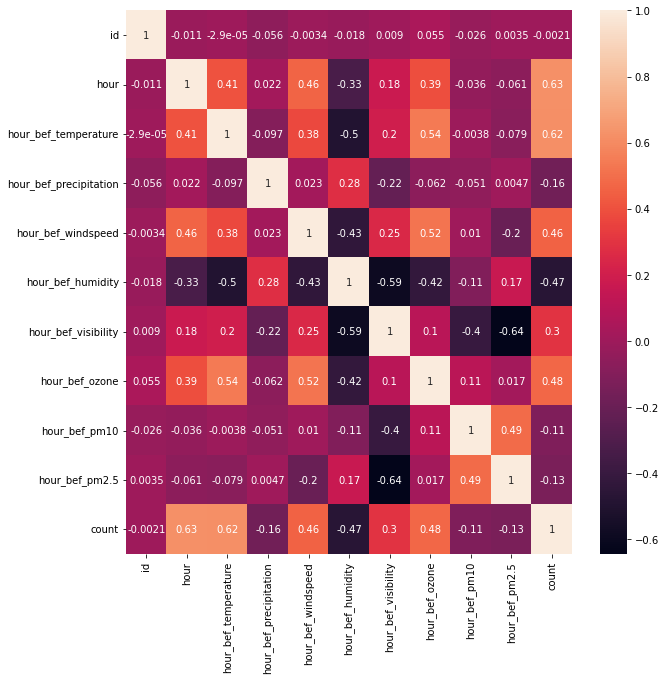

In [ ]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = False

sns.heatmap(train.corr(),annot=True)

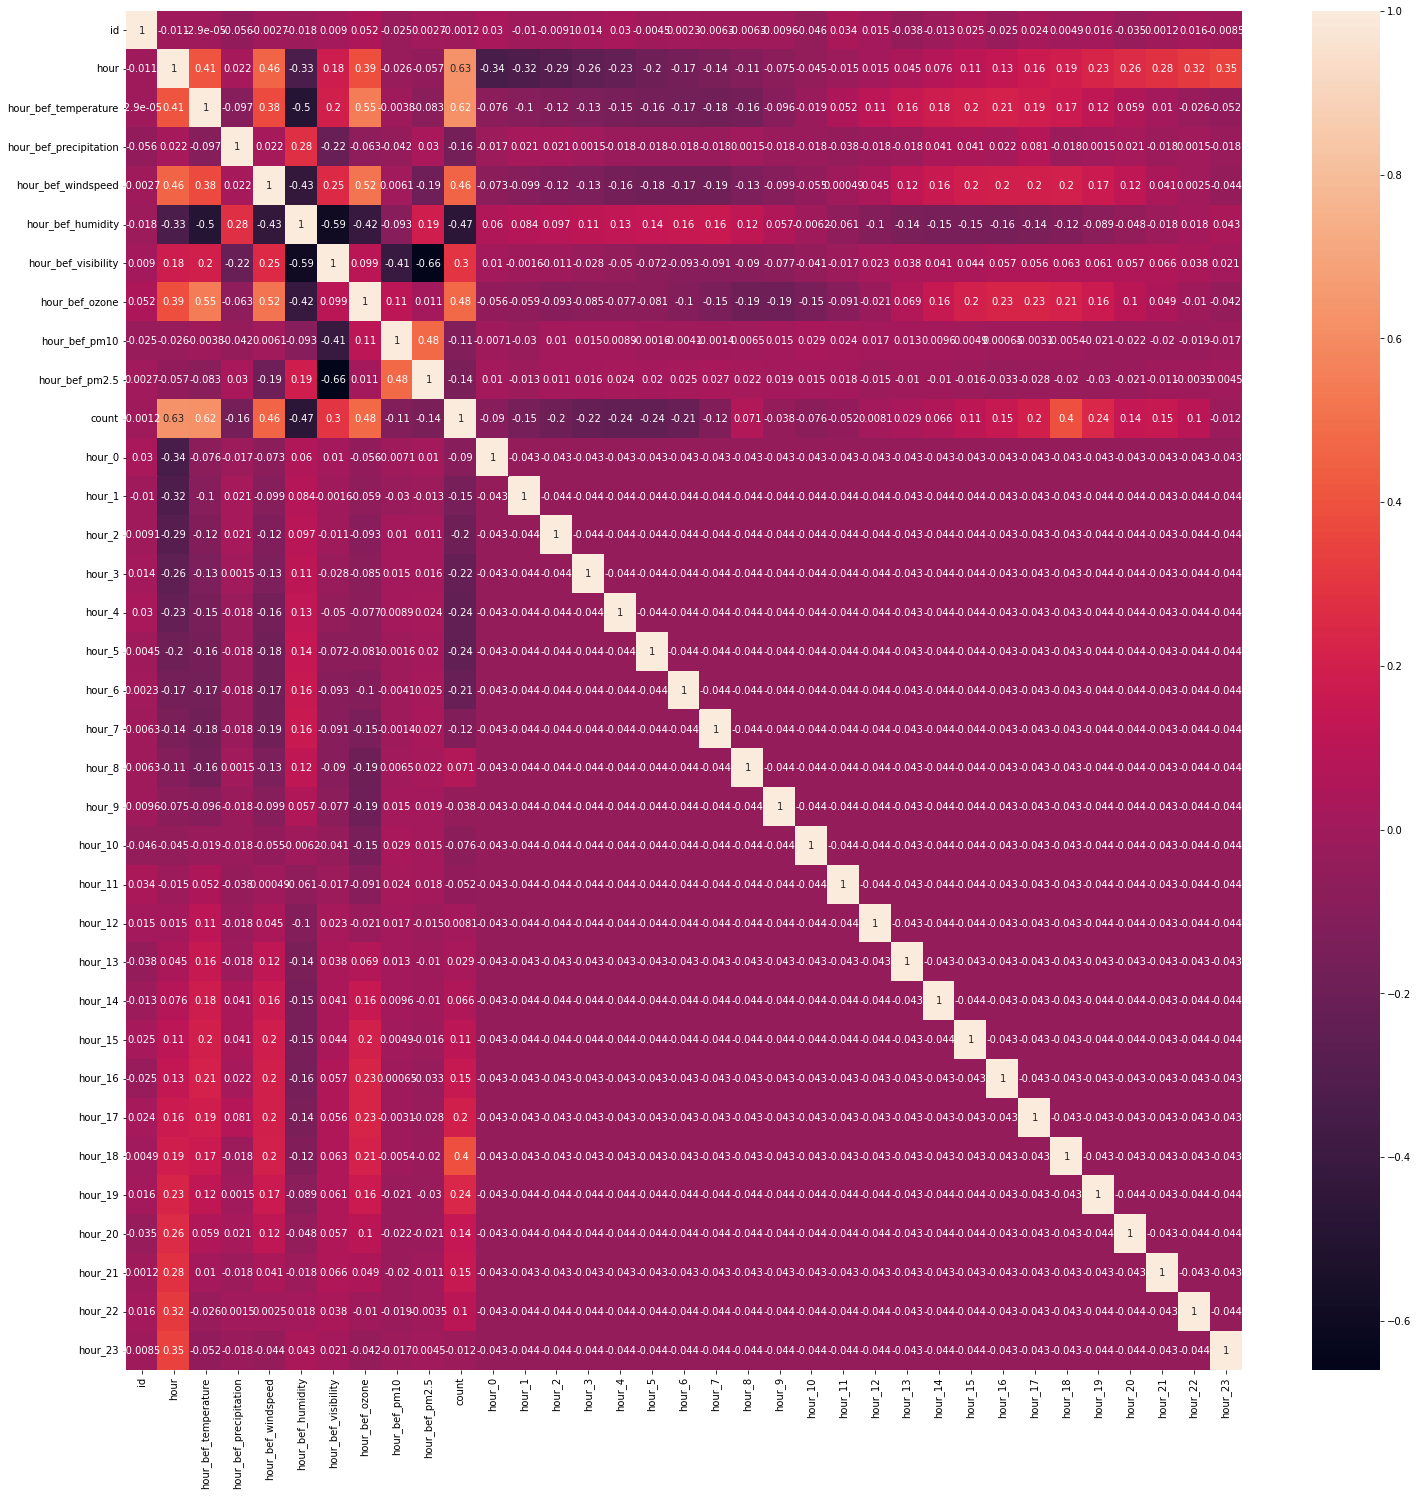

In [ ]:
plt.figure(figsize=(25,25))

mask = np.zeros_like(train2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = False

sns.heatmap(train2.corr(),annot=True)

#### test dataset

In [ ]:
test.isna().sum() 
#test의 결측치도 대체하기

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [ ]:
#온도
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test1=test

In [ ]:
#더미변수 생성
tedum = pd.get_dummies(test1['hour'])
test1 = test1.join(tedum.add_prefix('hour_'))
test1

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
test1.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
hour_0                     0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22                    0
hour_23                    0
dtype: int64

In [ ]:
test1[test1['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [ ]:
train2.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,1105.391901,11.496911,16.717433,0.031572,2.482052,52.231297,1405.216884,0.039003,56.952642,30.428277,108.684969,0.040494,0.041867,0.041867,0.041867,0.041867,0.041867,0.041867,0.041867,0.041867,0.041867,0.041867,0.041867,0.041867,0.041181,0.041867,0.041867,0.041181,0.041181,0.041181,0.041867,0.041867,0.041181,0.041867,0.041867
std,631.609634,6.918890,5.239150,0.174917,1.376531,20.370387,583.131708,0.019117,31.012822,14.482351,82.620202,0.197183,0.200354,0.200354,0.200354,0.200354,0.200354,0.200354,0.200354,0.200354,0.200354,0.200354,0.200354,0.200354,0.198776,0.200354,0.200354,0.198776,0.198776,0.198776,0.200354,0.200354,0.198776,0.200354,0.200354
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,555.000000,6.000000,12.800000,0.000000,1.400000,36.000000,879.000000,0.026000,36.000000,20.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1113.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.038000,51.000000,27.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1652.000000,17.000000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.051000,69.000000,37.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train2[train2['hour_19']==1].describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
count,61.000000,61.0,61.000000,61.000000,61.000000,61.00000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0
mean,1153.147541,19.0,19.704918,0.032787,3.595082,43.57377,1576.688525,0.053967,53.770492,28.327869,201.606557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
std,632.276254,0.0,4.605664,0.179556,1.153173,19.66084,523.652542,0.015620,26.547061,13.008614,75.977689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,55.000000,19.0,10.600000,0.000000,0.700000,8.00000,250.000000,0.022000,17.000000,10.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,601.000000,19.0,16.600000,0.000000,3.000000,29.00000,1222.000000,0.043000,36.000000,19.000000,150.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,1088.000000,19.0,19.400000,0.000000,3.700000,40.00000,1942.000000,0.053000,49.000000,25.000000,204.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,1699.000000,19.0,23.500000,0.000000,4.300000,53.00000,2000.000000,0.062000,67.000000,37.000000,244.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,2168.000000,19.0,28.700000,1.000000,7.000000,92.00000,2000.000000,0.100000,180.000000,62.000000,335.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#전부 결측치인 경우 19시 median 값들로 대체
train2[train2['hour']==19]['hour_bef_ozone'].median()

0.053

In [ ]:
for a in ['hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']:
  #print(test1.loc[653,a])
  #print( train2[train2['hour']==19][a].median() )
  test1.loc[653,a]=train2[train2['hour']==19][a].median()

test1.loc[653]

id                        1943.000
hour                        19.000
hour_bef_temperature        19.400
hour_bef_precipitation       0.000
hour_bef_windspeed           3.700
hour_bef_humidity           40.000
hour_bef_visibility       1942.000
hour_bef_ozone               0.053
hour_bef_pm10               49.000
hour_bef_pm2.5              25.000
hour_0                       0.000
hour_1                       0.000
hour_2                       0.000
hour_3                       0.000
hour_4                       0.000
hour_5                       0.000
hour_6                       0.000
hour_7                       0.000
hour_8                       0.000
hour_9                       0.000
hour_10                      0.000
hour_11                      0.000
hour_12                      0.000
hour_13                      0.000
hour_14                      0.000
hour_15                      0.000
hour_16                      0.000
hour_17                      0.000
hour_18             

In [ ]:
test1.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            34
hour_bef_pm10             36
hour_bef_pm2.5            35
hour_0                     0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22                    0
hour_23                    0
dtype: int64

In [ ]:
#ozone
test1[test1['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
32,82,1,22.8,0.0,2.4,52.0,2000.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,115,1,21.5,1.0,0.5,90.0,347.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47,147,1,22.8,0.0,1.2,57.0,1190.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86,260,1,20.0,0.0,2.0,65.0,1662.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,270,1,20.0,0.0,1.7,31.0,2000.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102,297,1,15.1,1.0,2.2,98.0,224.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,323,1,18.7,0.0,1.4,41.0,2000.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
126,352,1,19.2,0.0,1.4,80.0,1085.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129,358,1,23.6,0.0,0.9,83.0,466.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
209,609,1,18.6,0.0,2.4,37.0,2000.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#구간별 평균 온도와 평균오존농도

tempoz={}
for x in range(3, 31, 1):
    start = x
    end = x+1
    temp = train2[(train2["hour_bef_temperature"] >= start) & (train2["hour_bef_temperature"] < end)]
    tempoz[start]= temp["hour_bef_ozone"].mean()


#결측치 구간온도별 오존평균값으로 대체하는 반복문 작성
for i in test1[test1['hour_bef_ozone'].isna()].index:
  a=test1.loc[i,'hour_bef_temperature']
  aa=a//1 
  test1['hour_bef_ozone'].fillna({i:tempoz[aa]},inplace=True)

In [ ]:
test1[test1['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23


In [ ]:
test1[test1['hour_bef_pm10'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
18,42,18,29.4,0.0,3.3,43.0,1685.0,0.055000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
32,82,1,22.8,0.0,2.4,52.0,2000.0,0.050830,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,115,1,21.5,1.0,0.5,90.0,347.0,0.047054,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47,147,1,22.8,0.0,1.2,57.0,1190.0,0.050830,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86,260,1,20.0,0.0,2.0,65.0,1662.0,0.048357,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,270,1,20.0,0.0,1.7,31.0,2000.0,0.048357,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102,297,1,15.1,1.0,2.2,98.0,224.0,0.034958,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,323,1,18.7,0.0,1.4,41.0,2000.0,0.039660,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
126,352,1,19.2,0.0,1.4,80.0,1085.0,0.043236,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
128,356,15,25.5,0.0,3.6,40.0,1404.0,0.077000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#visibility 구간 나누기

tempv10={}
tempv25={}
for x in range(0, 2001 , 100):
    start = x
    end = x+100

    #0이상 100미만

    tempp = train2[(train2["hour_bef_visibility"] >= start) & (train2["hour_bef_visibility"] < end)]
    tempv10[start]= tempp["hour_bef_pm10"].median()
    tempv25[start]= tempp["hour_bef_pm2.5"].median()


#pm결측치 구간visibility별 미세먼지 median 값으로 대체하는 반복문 작성
for i in test1[test1['hour_bef_pm10'].isna()].index:
  b = test1.loc[i,'hour_bef_visibility']
  bb = (b//100)*100
  test1['hour_bef_pm10'].fillna( {i:tempv10[bb]},inplace=True )

for i in test1[test1['hour_bef_pm2.5'].isna()].index:
  b = test1.loc[i,'hour_bef_visibility']
  bb = (b//100)*100
  test1['hour_bef_pm2.5'].fillna( {i:tempv25[bb]},inplace=True )



In [ ]:
test1.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
hour_0                    0
hour_1                    0
hour_2                    0
hour_3                    0
hour_4                    0
hour_5                    0
hour_6                    0
hour_7                    0
hour_8                    0
hour_9                    0
hour_10                   0
hour_11                   0
hour_12                   0
hour_13                   0
hour_14                   0
hour_15                   0
hour_16                   0
hour_17                   0
hour_18                   0
hour_19                   0
hour_20                   0
hour_21                   0
hour_22                   0
hour_23                   0
dtype: int64

Random forest

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

In [ ]:
train2.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

random forest 의 옵션 (ctrl+shift)

n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None

- n_estimators : n개의 나무들로 학습. 200,300 바꿀 수도 있음
- n_jobs : cpu 개수. n_jobs=-1 하면 cpu 모두 
- max_depth : 나무의 깊이. overfitting 방지.

# 모델링

## train - train / test split

In [ ]:
#X=train2.drop(['id','count'],axis=1)
features=['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

X=train2[features]
y=train2['count']


#train 을 train/test로 분리
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train, y_test= train_test_split(X,y, test_size=0.2)

"""
#데이터 정규화
from sklearn.preprocessing import StandardScaler
normalizer=StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)
"""

'\n#데이터 정규화\nfrom sklearn.preprocessing import StandardScaler\nnormalizer=StandardScaler()\nX_train = normalizer.fit_transform(X_train)\nX_test = normalizer.transform(X_test)\n'

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1165, 9)
(292, 9)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
rg = RandomForestRegressor()
param={'min_samples_split': [2,5,10],
       'min_samples_leaf':[1,2,4],
        'max_depth': range(10,16),
        'n_estimators': [100,200,300,400],
       'criterion':['mae','mse']}


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(model, param_grid = param, cv = 3)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'criterion': 'mse', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
최고 예측 정확도: 0.7543


In [ ]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.985814,0.003938,0.012957,0.000327,mae,10,2,100,"{'criterion': 'mae', 'max_depth': 10, 'min_sam...",0.764827,0.774685,0.777703,0.772405,0.005498,107
1,3.959694,0.025033,0.023330,0.000599,mae,10,2,200,"{'criterion': 'mae', 'max_depth': 10, 'min_sam...",0.775321,0.775550,0.768137,0.773003,0.003442,98
2,5.894611,0.029550,0.034919,0.003450,mae,10,2,300,"{'criterion': 'mae', 'max_depth': 10, 'min_sam...",0.775728,0.775776,0.769819,0.773774,0.002797,91
3,7.837167,0.012756,0.042654,0.001122,mae,10,2,400,"{'criterion': 'mae', 'max_depth': 10, 'min_sam...",0.775008,0.772079,0.772123,0.773070,0.001371,97
4,1.901616,0.004600,0.011962,0.000351,mae,10,5,100,"{'criterion': 'mae', 'max_depth': 10, 'min_sam...",0.769465,0.774238,0.773396,0.772366,0.002080,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.503285,0.012034,0.043324,0.001008,mse,15,5,400,"{'criterion': 'mse', 'max_depth': 15, 'min_sam...",0.775572,0.786394,0.782137,0.781368,0.004451,9
140,0.343243,0.008216,0.011376,0.000081,mse,15,10,100,"{'criterion': 'mse', 'max_depth': 15, 'min_sam...",0.770213,0.774447,0.777315,0.773992,0.002917,87
141,0.684132,0.011008,0.020825,0.000579,mse,15,10,200,"{'criterion': 'mse', 'max_depth': 15, 'min_sam...",0.766776,0.777705,0.772570,0.772350,0.004464,109
142,1.024204,0.009986,0.030147,0.001026,mse,15,10,300,"{'criterion': 'mse', 'max_depth': 15, 'min_sam...",0.767527,0.778871,0.773694,0.773364,0.004637,96


In [ ]:
grid_cv.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
best_rg = grid_cv.best_estimator_
best_rg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred = best_rg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #MAE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) #MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #
print('R-squared score: ', r2_score(y_test,y_pred))


Mean Absolute Error: 25.37960445192446
Mean Squared Error: 1285.9454518966734
Root Mean Squared Error: 35.860081593558505
R-squared score:  0.7779533809201988


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_

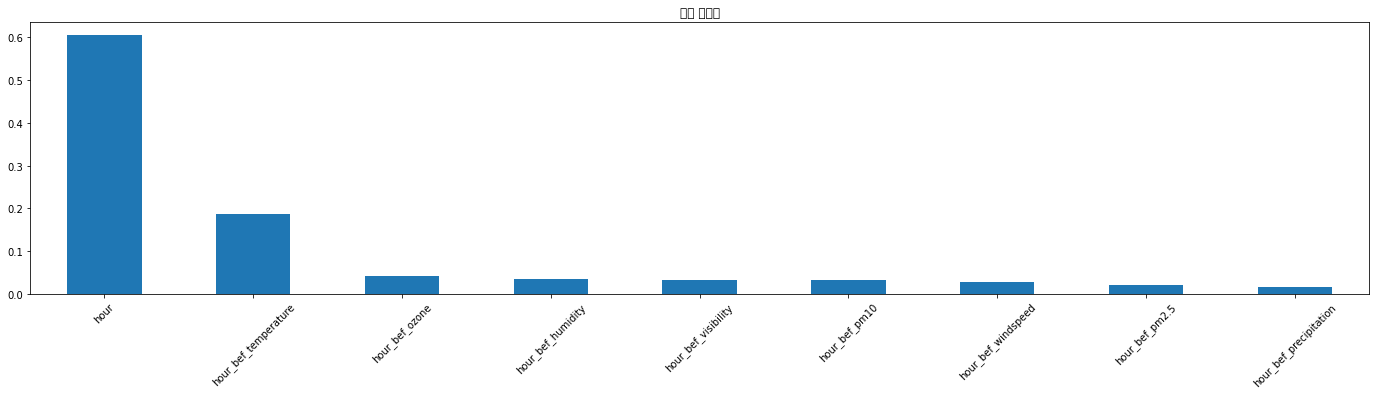

In [ ]:
feature_importance = pd.Series(index=features, data=best_rg.feature_importances_).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(24, 5), title="피쳐 중요도", rot=0)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current

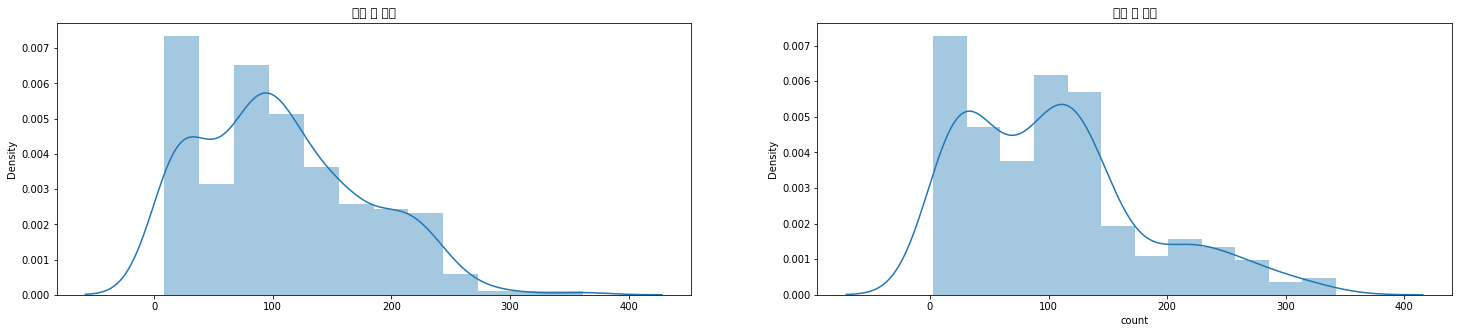

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  

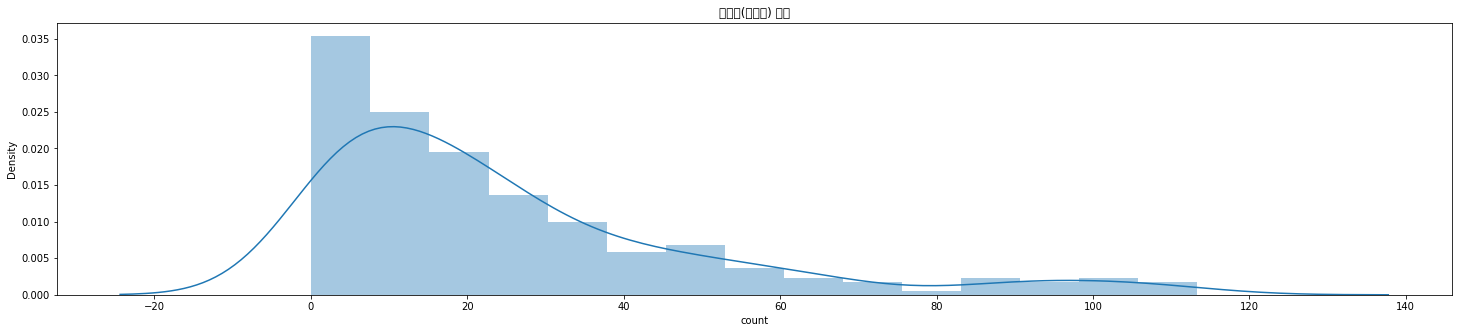

In [ ]:
predictions = best_rg.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(25, 5))
sns.distplot(predictions, ax=axes[0])
axes[0].set_title("예측 값 분포")
sns.distplot(y_test, ax=axes[1])
axes[1].set_title("실제 값 분포")
plt.show()

plt.figure(figsize=(25, 5))
sns.distplot(abs(predictions - y_test))
plt.title("오차값(절대값) 분포")
plt.show()

## train parameter

In [ ]:
"""
features=['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count']

"""



X_train = train2[features]
y_train = train2['count']
X_test = test1[features]


In [ ]:
model_100 = RandomForestRegressor(n_estimators=100, n_jobs = -1)
model_200 = RandomForestRegressor(n_estimators=200, n_jobs = -1)
model_300 = RandomForestRegressor(n_estimators=300, n_jobs = -1)
model_400 = RandomForestRegressor(n_estimators=400, n_jobs = -1)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score = cross_val_score(model_100, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_200, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_300, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_400, X_train, y_train)
print(np.mean(score))


0.7843883311998556
0.7863143288877608
0.7851423146117952
0.7865002279470206


In [ ]:
model_sam_2 = RandomForestRegressor(n_estimators=300, n_jobs = -1,  min_samples_split=2)
model_sam_5 = RandomForestRegressor(n_estimators=300, n_jobs = -1,  min_samples_split=5)
model_sam_10 = RandomForestRegressor(n_estimators=300, n_jobs = -1,  min_samples_split=10)

In [ ]:
score = cross_val_score(model_sam_2, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_sam_5, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_sam_10, X_train, y_train)
print(np.mean(score))

0.7881235631511172
0.7839597348640729
0.7802104120720881


In [ ]:
model_dep_10 = RandomForestRegressor(n_estimators=300, n_jobs = -1,  min_samples_split=2, max_depth=10)
model_dep_11 = RandomForestRegressor(n_estimators=300, n_jobs = -1,  min_samples_split=2, max_depth=11)
model_dep_12 = RandomForestRegressor(n_estimators=300, n_jobs = -1,  min_samples_split=2, max_depth=12)
model_dep_13 = RandomForestRegressor(n_estimators=300, n_jobs = -1,  min_samples_split=2, max_depth=13)
model_dep_14 = RandomForestRegressor(n_estimators=300, n_jobs = -1,  min_samples_split=2, max_depth=14)
model_dep_15 = RandomForestRegressor(n_estimators=300, n_jobs = -1,  min_samples_split=2, max_depth=15)

In [ ]:
score = cross_val_score(model_dep_10, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_11, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_12, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_13, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_14, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_15, X_train, y_train)
print(np.mean(score))

0.7832973650566845
0.7840559106009136
0.7855111661121741
0.7850072156141048
0.7854257972274232
0.7849801653666132


## train for submission

In [ ]:
"""X_train = train2.drop(['id', 'count'], axis = 1)
y_train = train2['count']
X_test = test1.drop('id', axis = 1)
"""

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300, n_jobs = -1,  min_samples_split=2,max_depth=12)

In [ ]:
X_train.shape, y_train.shape, X_test.shape

((1457, 9), (1457,), (715, 9))

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
submission['count'] = model.predict(X_test)

In [ ]:
submission.to_csv('1003data.csv', index = False)